Saving nba_traditional_stats_2024_2025.csv to nba_traditional_stats_2024_2025.csv
Using file: nba_traditional_stats_2024_2025.csv
Qualified 20+ PPG scorers: 48
Sample of Low FT Dependency Scorers (20+ PPG):


,PLAYER,TEAM,GP,MIN,PTS,PPG,FTM,FTA,FT_PCT,FT_Dependency
0,CJ McCollum,NOP,56,1832,1183,21.125000,124,173,0.717,10.481826
1,Brandon Miller,CHA,27,924,568,21.037037,68,79,0.861,11.971831
2,Kawhi Leonard,LAC,37,1180,796,21.513514,98,121,0.810,12.311558
3,Zach LaVine,SAC,74,2603,1724,23.297297,235,285,0.825,13.631090
4,Victor Wembanyama,SAS,46,1527,1116,24.260870,158,189,0.836,14.157706
5,Pascal Siakam,IND,78,2548,1578,20.230769,226,308,0.734,14.321926
6,Darius Garland,CLE,75,2301,1544,20.586667,224,255,0.878,14.507772
7,LeBron James,LAL,70,2444,1710,24.428571,259,331,0.782,15.146199
8,Jamal Murray,DEN,67,2418,1436,21.432836,218,246,0.886,15.181058
9,Tyler Herro,MIA,77,2725,1840,23.896104,287,327,0.878,15.597826


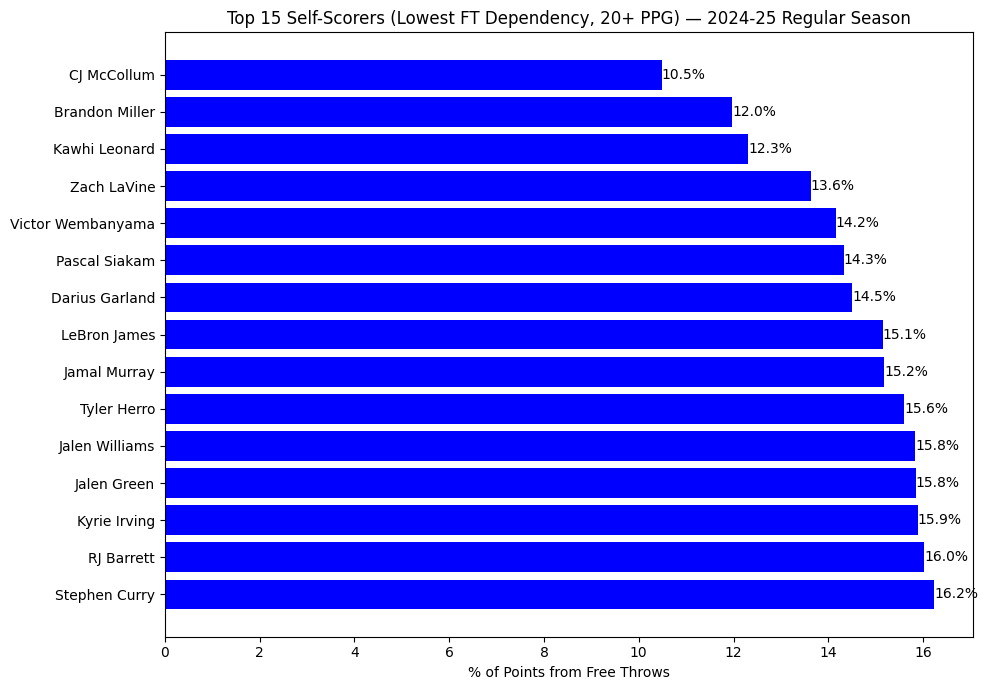


Saved:
- low_ft_dependency_20ppg_2024_25.csv (all qualified 20+ PPG scorers)
- leaders_low_ft_dependency_20ppg_2024_25.csv (top 15 least FT dependent)
- low_ft_dependency_20ppg.png


In [1]:
# 🏀 Low FT Dependency (Self-Scorers, 20+ PPG) — 2024-25 Regular Season
# --------------------------------------------------------------------
# Dataset columns used:
# PLAYER, TEAM, Year, Season Type, GP, MIN, PTS, FTM, FTA, FT_PCT
# --------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", None)

# ================================
# 1) Load CSV (Colab or Local)
# ================================
try:
    from google.colab import files
    uploaded = files.upload()
    file_path = list(uploaded.keys())[0]
except:
    file_path = "nba_traditional_stats_2024_2025.csv"   # <-- change if local

print("Using file:", file_path)
df = pd.read_csv(file_path)
df.columns = [c.strip() for c in df.columns]

# Clean Season Type
if "Season Type" in df.columns:
    df["Season Type"] = df["Season Type"].astype(str).str.replace("%20", " ", regex=False)

# Ensure numeric
num_cols = ["GP","MIN","PTS","FTM","FTA","FT_PCT"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# ================================
# 2) Filter to 2024-25 Regular Season
# ================================
df_use = df[(df["Year"] == "2024-25") &
            (df["Season Type"].str.lower() == "regular season")].copy()

# Minimum filters
MIN_GP = 20
MIN_MINUTES = 300

df_use = df_use[(df_use["GP"] >= MIN_GP) & (df_use["MIN"] >= MIN_MINUTES)].copy()

# Add PPG
df_use["PPG"] = np.where(df_use["GP"] > 0, df_use["PTS"] / df_use["GP"], np.nan)

# Keep only 20+ PPG scorers
df_use = df_use[df_use["PPG"] >= 20].copy()

print(f"Qualified 20+ PPG scorers: {len(df_use)}")

# ================================
# 3) Compute FT Dependency
# ================================
df_use["FT_Dependency"] = np.where(df_use["PTS"] > 0, (df_use["FTM"] / df_use["PTS"]) * 100, np.nan)

cols_out = ["PLAYER","TEAM","GP","MIN","PTS","PPG","FTM","FTA","FT_PCT","FT_Dependency"]
ft_low_tbl = (df_use[cols_out]
              .sort_values("FT_Dependency", ascending=True)
              .reset_index(drop=True))

print("Sample of Low FT Dependency Scorers (20+ PPG):")
display(ft_low_tbl.head(10))

# ================================
# 4) Leaderboard Plot (Lowest FT Dependency)
# ================================
TOPN = 15
leaders_low = ft_low_tbl.head(TOPN)

plt.figure(figsize=(10, 7))
plt.barh(leaders_low["PLAYER"][::-1], leaders_low["FT_Dependency"][::-1], color="blue")
for i, v in enumerate(leaders_low["FT_Dependency"][::-1]):
    plt.text(v, i, f"{v:.1f}%", va="center", ha="left")
plt.xlabel("% of Points from Free Throws")
plt.title(f"Top {TOPN} Self-Scorers (Lowest FT Dependency, 20+ PPG) — 2024-25 Regular Season")
plt.tight_layout()
plt.savefig("low_ft_dependency_20ppg.png", dpi=300)
plt.show()

# ================================
# 5) Save Outputs
# ================================
ft_low_tbl.to_csv("low_ft_dependency_20ppg_2024_25.csv", index=False)
leaders_low.to_csv("leaders_low_ft_dependency_20ppg_2024_25.csv", index=False)

print("\nSaved:")
print("- low_ft_dependency_20ppg_2024_25.csv (all qualified 20+ PPG scorers)")
print("- leaders_low_ft_dependency_20ppg_2024_25.csv (top 15 least FT dependent)")
print("- low_ft_dependency_20ppg.png")